# Breast Cancer Classification

## Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
feature_raw, label_raw = load_breast_cancer(return_X_y=True)
print(feature_raw.shape, label_raw.shape)

(569, 30) (569,)


### Regulate Dataset

In [2]:
feature_train = feature_raw / feature_raw.max(axis=0)
label_train = label_raw.reshape(-1, 1)
print(feature_train.shape, label_train.shape)

(569, 30) (569, 1)


## Make a Model

In [3]:
# Define linear function
def linear(in_features, weight, bias):
    return in_features @ weight.T + bias

# Define ReLU function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(in_features, weight, bias):
    out_features = linear(in_features, weight, bias)
    preds = sigmoid(out_features)
    return preds

# Sanity check
w_dummy = np.random.normal(0, 1e-2, (1, feature_train.shape[1]))
b_dummy = np.random.normal(0, 1e-2)
pred_dummy = forward(feature_train, w_dummy, b_dummy)
# print(pred_dummy)
pred_class_dummy = pred_dummy > 0.5
# print(pred_class_dummy)
# print(pred_class_dummy, label_train)
# print(pred_class_dummy==label_train)
accuracy = np.sum(pred_class_dummy==label_train) / label_train.shape[0]
print(accuracy)

0.37258347978910367


## Evaluate Model with Binary Cross-Entropy Loss
$\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} -{}^{(i)}y \ln {}^{(i)}\hat{y} - (1 - {}^{(i)}y) \ln (1 - {}^{(i)}\hat{y}) = \overline{-\mathbf{y} \ln \hat{\mathbf{y}} - (1 - \mathbf{y}) \ln (1 - \hat{\mathbf{y}})}$


In [4]:
def bce_loss(preds, labels):
    error = -labels * np.log(preds) - (1 - labels) * np.log(1 - preds)
    return np.mean(error)

# Sanity check
loss_dummy = bce_loss(pred_dummy, label_train)
print(loss_dummy)

0.6959195924655297


## Gradient Descent Model Optimization

initial parameters: w = [[-5.08656415e-05  1.34455192e-04  1.18424178e-04  3.33003647e-05
   2.91516480e-06  4.09729192e-05 -1.55588800e-04 -1.89163465e-05
   7.97289195e-05  4.62244615e-05  4.04202935e-05 -7.92690960e-06
  -2.19572452e-06  1.55184674e-05  8.24522547e-05 -1.39645951e-05
  -1.87629969e-05  1.34866669e-04 -1.72871923e-04 -4.53326534e-05
   1.46858051e-05 -2.60144908e-05  1.87536357e-04  3.82527831e-05
  -5.42942404e-05 -9.64499548e-05 -4.50849745e-05 -5.58037514e-05
  -1.47586190e-04 -1.70602340e-05]], b = -6.548536640400825e-05
loss @ 1 iteration: 0.6931442010912346
loss @ 2 iteration: 0.6634479828063694
loss @ 3 iteration: 0.6439731187411578
loss @ 4 iteration: 0.6257482331860417
loss @ 5 iteration: 0.60867667438727
loss @ 6 iteration: 0.5926779035711026
loss @ 7 iteration: 0.5776745047207726
loss @ 8 iteration: 0.5635929023929256
loss @ 9 iteration: 0.5503638229979705
loss @ 10 iteration: 0.5379225390510495
loss @ 11 iteration: 0.5262089391174151
loss @ 12 iteration: 

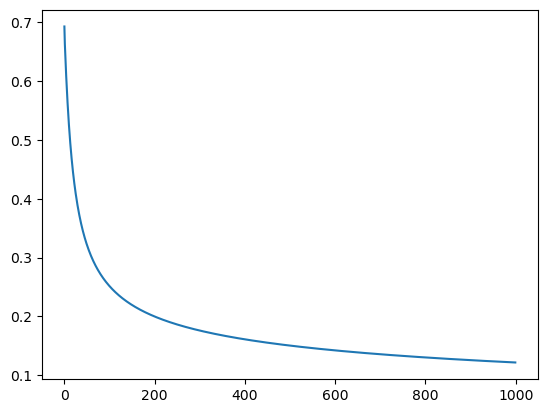

In [5]:
def grad(in_features, preds, labels):
    dw = 1 / labels.shape[0] * (preds - labels).T @ in_features
    db = np.mean(preds - labels)
    return dw, db

w = np.random.normal(0, 1e-4, (1, feature_train.shape[1])) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 1000
learning_rate = 0.8
losses = []
for i in range(num_iters):
    pred_train = forward(feature_train, w, b)
    loss = bce_loss(pred_train, label_train)
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
    dw, db = grad(feature_train, pred_train, label_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
import matplotlib.pyplot as plt
plt.plot(losses)

## Assess Training Accuracy

In [6]:
pred_class_train = pred_train > 0.5
acc_train = np.sum(pred_class_train==label_train) / label_train.shape[0]
print(acc_train)
print(f"prediction: {pred_train.squeeze()[:20]}")
print(f"pred class: {pred_class_train.squeeze()[:20]}")
print(f"true class: {label_raw[:20]}")


0.9648506151142355
prediction: [1.35622995e-04 1.54303326e-02 6.37850765e-04 1.15695753e-01
 1.07899392e-02 3.41064887e-01 1.21417199e-02 5.05043787e-01
 6.81064866e-02 2.12909400e-02 4.88040440e-01 5.55495983e-02
 1.81160417e-02 4.52880936e-01 5.69221486e-02 4.59942658e-02
 1.68748461e-01 1.11486436e-02 1.75346874e-04 8.06746514e-01]
pred class: [False False False False False False False  True False False False False
 False False False False False False False  True]
true class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
